# <H1 style="text-align: center;"><b>K-Means Clustering en datos "reales"</b></p>

## Base de Datos: `Mall_Customers.csv`

La siguiente base de datos contiene información de clientes de un centro comercial. Las variables son las siguientes:

1. **CustomerID**: Identificación única de cada cliente.
2. **Género**: Género del cliente (`Male` / `Female`).
3. **Edad**: Edad del cliente en años.
4. **Ingresos Anuales (k$)**: Ingresos anuales del cliente en miles de dólares.
5. **Puntuación de Gastos (1-100)**: Puntuación asignada por el centro comercial basada en el comportamiento del cliente y la naturaleza del gasto.

Para esta implementación solo usamos edad, ingresos anuales y puntuación de gastos

In [1]:
# Cargamos librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import kmeans
import graphers as grph
import metric
import analytics

In [2]:
# Cargamos la base de datos
mall_data = pd.read_csv("data/Mall_Customers.csv")
# Mostrar las primeras filas del DataFrame
print("Datos de Mall Customers:")
print(mall_data.head())

Datos de Mall Customers:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


### Estudio estadístico de los datos

In [3]:
# Estudio estadistico de las variables
mall_data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


### Gráfica de los datos

In [4]:
# Normalizamos los datos

# Eliminar las variables categóricas
mall_data_numeric = mall_data.select_dtypes(include=[np.number])
mall_data_numeric = mall_data_numeric.drop(columns=['CustomerID'])
# Centralizar las variables restantes
mall_data_centered = mall_data_numeric - mall_data_numeric.mean()
# Dividir por la desviación estándar de cada columna
mall_data_standardized = mall_data_centered / mall_data_centered.std()
# Mostrar las primeras filas del DataFrame estandarizado
print("Datos estandarizados de Mall Customers:")
print(mall_data_standardized.head())

Datos estandarizados de Mall Customers:
        Age  Annual Income (k$)  Spending Score (1-100)
0 -1.421003           -1.734646               -0.433713
1 -1.277829           -1.734646                1.192711
2 -1.349416           -1.696572               -1.711618
3 -1.134655           -1.696572                1.037814
4 -0.561958           -1.658498               -0.394989


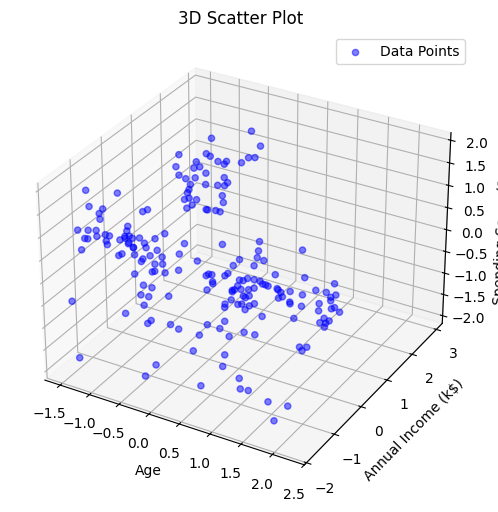

In [5]:
grph.scatter_3d(mall_data_standardized)

### Implementación de K-Means

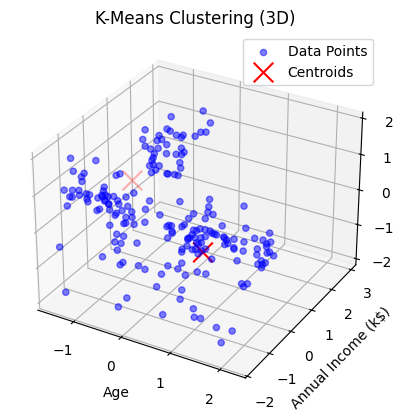

In [10]:
k = 2
seed = 42
metrica = metric.euclidean

centroids, clusters = kmeans.Kmeans(mall_data_standardized, k, metrica, seed)
grph.plot_3d(mall_data_standardized, centroids)

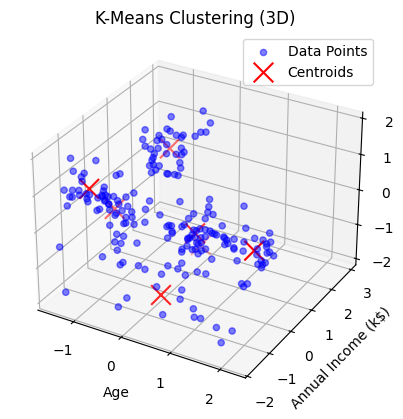

In [11]:
k = 7
seed = 42
metrica = metric.euclidean

centroids, clusters = kmeans.Kmeans(mall_data_standardized, k, metrica, seed)
grph.plot_3d(mall_data_standardized, centroids)

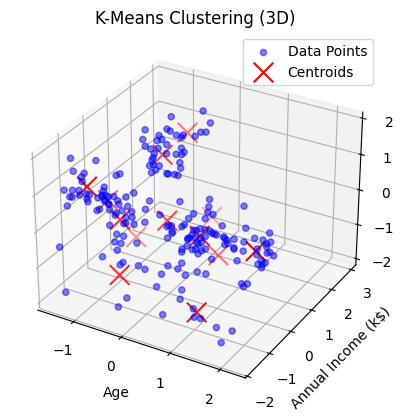

In [12]:
k = 13
seed = 42
metrica = metric.euclidean

centroids, clusters = kmeans.Kmeans(mall_data_standardized, k, metrica, seed)
grph.plot_3d(mall_data_standardized, centroids)

### Método del Codo en K-Means

El **método del codo** es una técnica para determinar el número óptimo de clusters en K-Means. Se basa en la **inercia**, que mide la suma de las distancias cuadradas de los puntos a sus centroides.

#### Pasos:
1. Ejecutar K-Means con diferentes valores de \( k \) (número de clusters).
2. Calcular la **inercia** para cada \( k \).
3. Graficar la inercia en función de \( k \).
4. Identificar el punto donde la disminución en inercia deja de ser significativa (el "codo" de la curva).
5. Elegir ese \( k \) como el número óptimo de clusters.

#### Interpretación Gráfica:
- Para valores bajos de \( k \), la inercia es alta porque los clusters son grandes y dispersos.
- A medida que \( k \) aumenta, la inercia disminuye.
- **El punto óptimo es donde la pendiente cambia bruscamente**, formando un "codo".

Este método ayuda a encontrar un buen balance entre pocos clusters (alta inercia) y muchos clusters (sobreajuste).

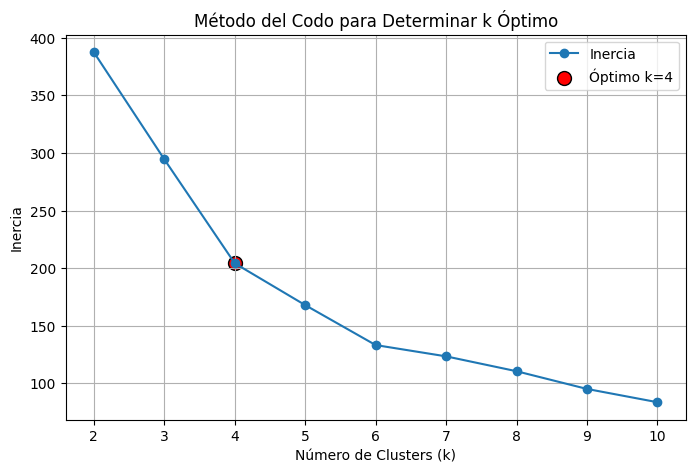

El número óptimo de clusters es k = 4


In [6]:
# Implementacion del metodo del codo con segunda derivada

k_range = range(2, 11)
inertias = []
seed = 41

for k in k_range:
    centroids, clusters = kmeans.Kmeans(mall_data_standardized, k, metric.euclidean, seed)
    inertia = metric.inertia(clusters, centroids, metric.euclidean)
    inertias.append(inertia)

# Calcular la segunda derivada aproximada para encontrar el codo
curvatures = []
for i in range(1, len(inertias) - 1):
    k_left, k_mid, k_right = k_range[i - 1], k_range[i], k_range[i + 1]
    y_left, y_mid, y_right = inertias[i - 1], inertias[i], inertias[i + 1]
    
    # Segunda derivada finita (curvatura)
    numerator = (y_right - y_mid) - (y_mid - y_left)
    denominator = (k_right - k_mid) ** 2
    curvature = numerator / denominator if denominator != 0 else 0
    curvatures.append(abs(curvature))

# Encontrar el índice de máxima curvatura
optimal_k_index = np.argmax(curvatures) + 1  # +1 porque curvatures empieza en 1
optimal_k = k_range[optimal_k_index]

# Graficar el método del codo
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertias, marker='o', linestyle='-', label="Inercia")
plt.scatter(optimal_k, inertias[optimal_k_index], color='red', s=100, label=f'Óptimo k={optimal_k}', edgecolors='black')
plt.xlabel("Número de Clusters (k)")
plt.ylabel("Inercia")
plt.title("Método del Codo para Determinar k Óptimo")
plt.xticks(k_range)
plt.legend()
plt.grid(True)
plt.show()

print(f"El número óptimo de clusters es k = {optimal_k}")

### Análisis

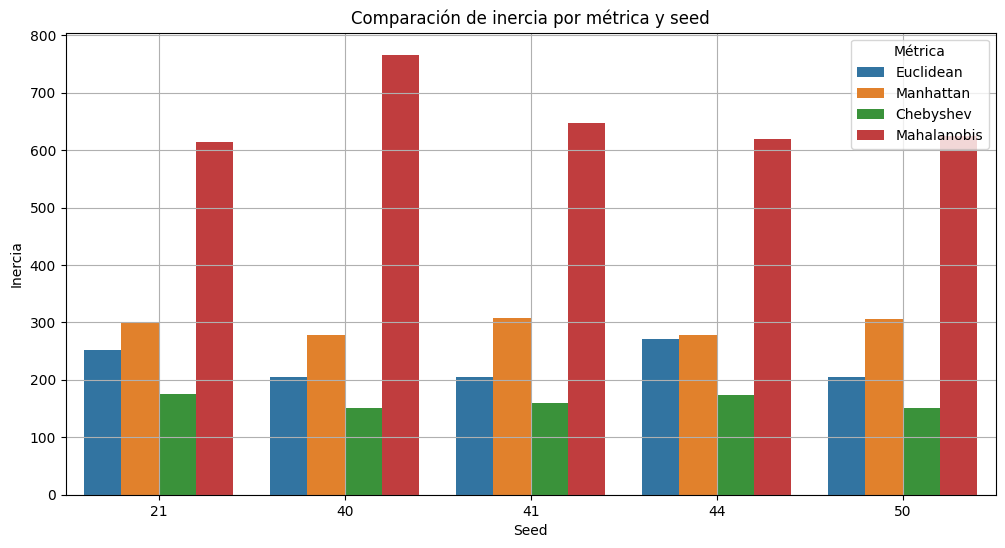

In [8]:
k = 4
seed = 42
seeds = [41,40,21,44,50]
A = np.array([
    [3, 1, 1],
    [1, 3, 1],
    [1, 1, 3]
])

analisis = analytics.analysis_multiple_seeds(mall_data_standardized, k, A, seeds)
analytics.compare_inertia_by_seed(analisis)

### Conclusión

Podemos ver que la métrica con mejores resultados Chebyshev y el número de clusters óptimo es 4.